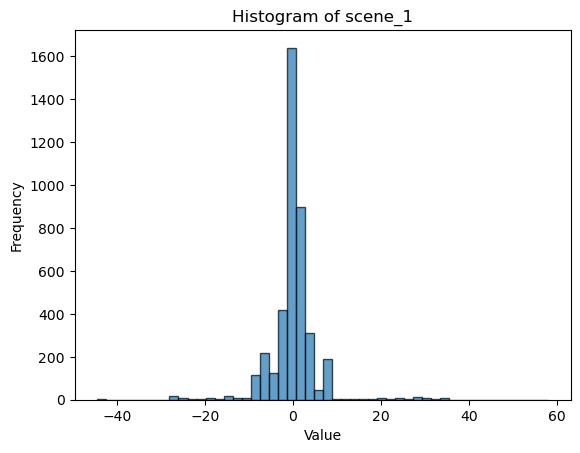

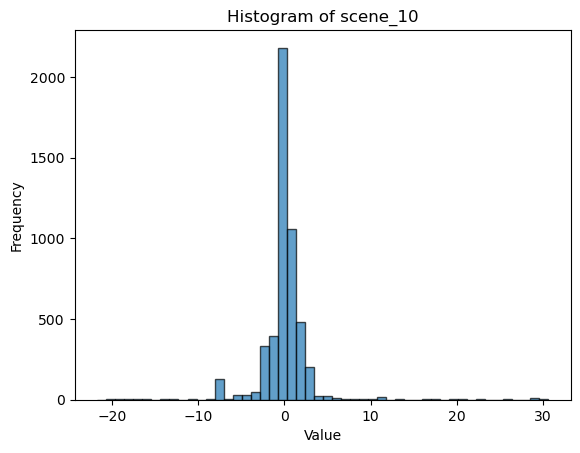

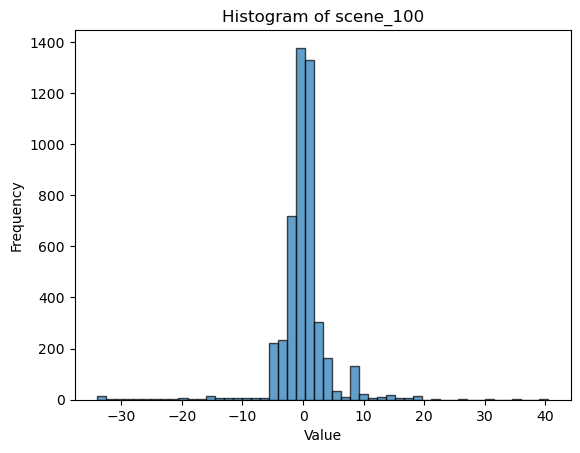

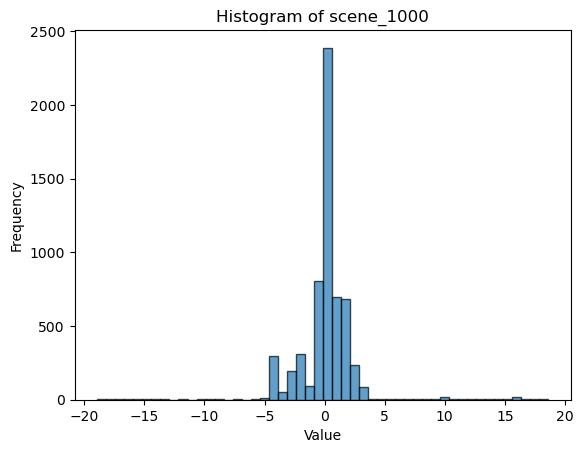

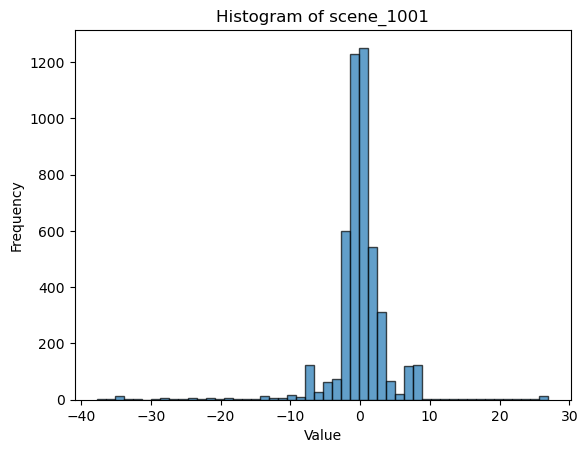

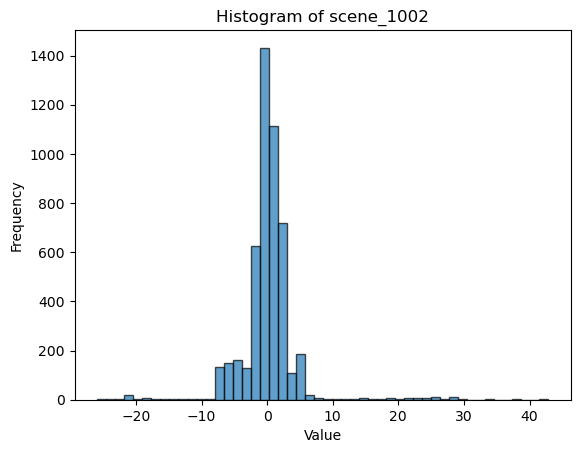

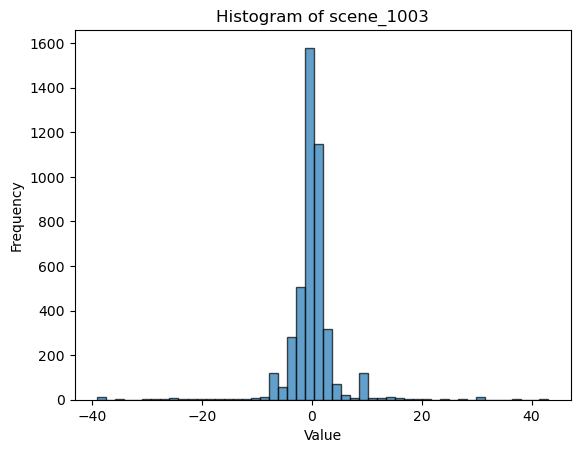

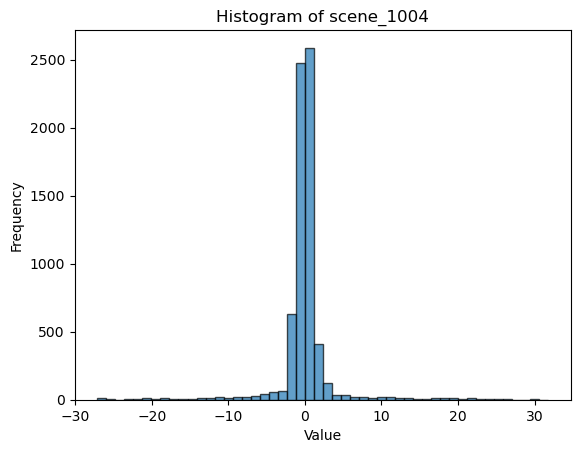

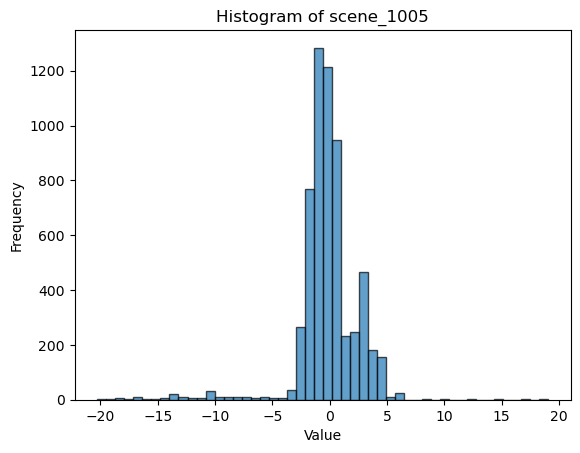

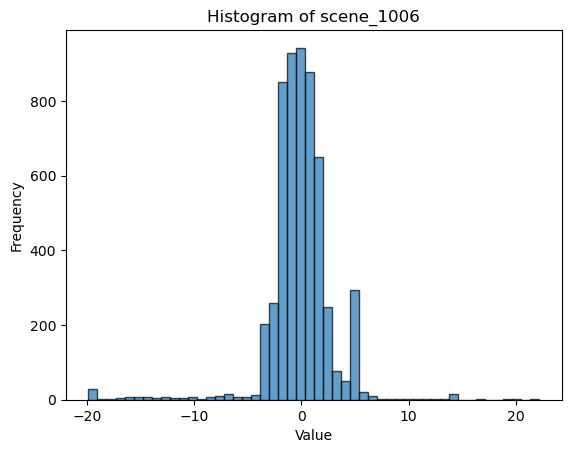

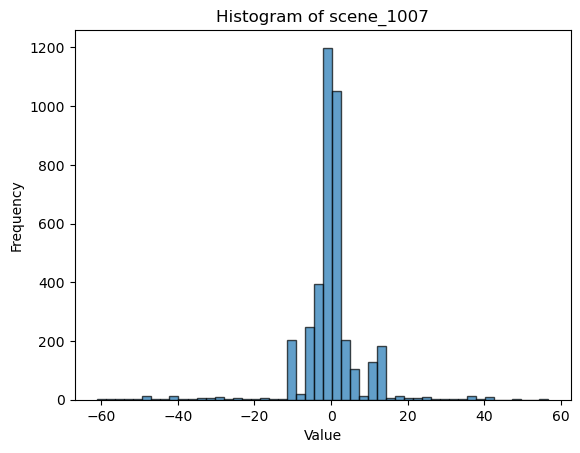

In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

# Open the .h5 file
file_path = 'unlocked_motions.h5'

with h5py.File(file_path, 'r') as file:
    trajectories_group = file['trajectories']
    
    # Plot each scene's data
    for i, dataset_name in enumerate(trajectories_group.keys()):
        # Access the dataset
        data = trajectories_group[dataset_name][:]
        
        # Flatten and plot
        plt.hist(data.flatten(), bins=50, edgecolor='black', alpha=0.7)
        plt.title(f"Histogram of {dataset_name}")
        plt.xlabel("Value")
        plt.ylabel("Frequency")
        plt.show()
        
        # Optional: Limit to the first N scenes
        if i >= 10:  # Plot the first 10 scenes only (adjust as needed)
            break


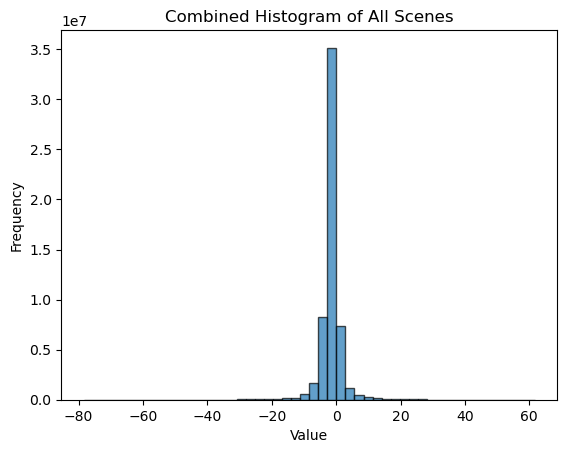

In [4]:
# Trying to combine all scenes on one histogram 

import h5py
import numpy as np
import matplotlib.pyplot as plt

# Open the .h5 file
file_path = 'unlocked_motions.h5'

# Parameters for the histogram
bins = 50
range_min, range_max = None, None

# First pass: Determine the global min and max for bin ranges
with h5py.File(file_path, 'r') as file:
    trajectories_group = file['trajectories']
    for dataset_name in trajectories_group.keys():
        data = trajectories_group[dataset_name][:]
        if range_min is None or range_max is None:
            range_min, range_max = np.min(data), np.max(data)
        else:
            range_min = min(range_min, np.min(data))
            range_max = max(range_max, np.max(data))

# Create global bins
global_bins = np.linspace(range_min, range_max, bins + 1)

# Second pass: Incrementally calculate the histogram
global_hist = np.zeros(bins)

with h5py.File(file_path, 'r') as file:
    trajectories_group = file['trajectories']
    for dataset_name in trajectories_group.keys():
        data = trajectories_group[dataset_name][:]
        # Update the histogram
        hist, _ = np.histogram(data, bins=global_bins)
        global_hist += hist

# Plot the combined histogram
plt.bar(global_bins[:-1], global_hist, width=np.diff(global_bins), edgecolor='black', alpha=0.7)
plt.title("Combined Histogram of All Scenes")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()
